In [1]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


In [2]:
entity_df = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\pima-indians-subset.csv')
entity_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


scanning missing values


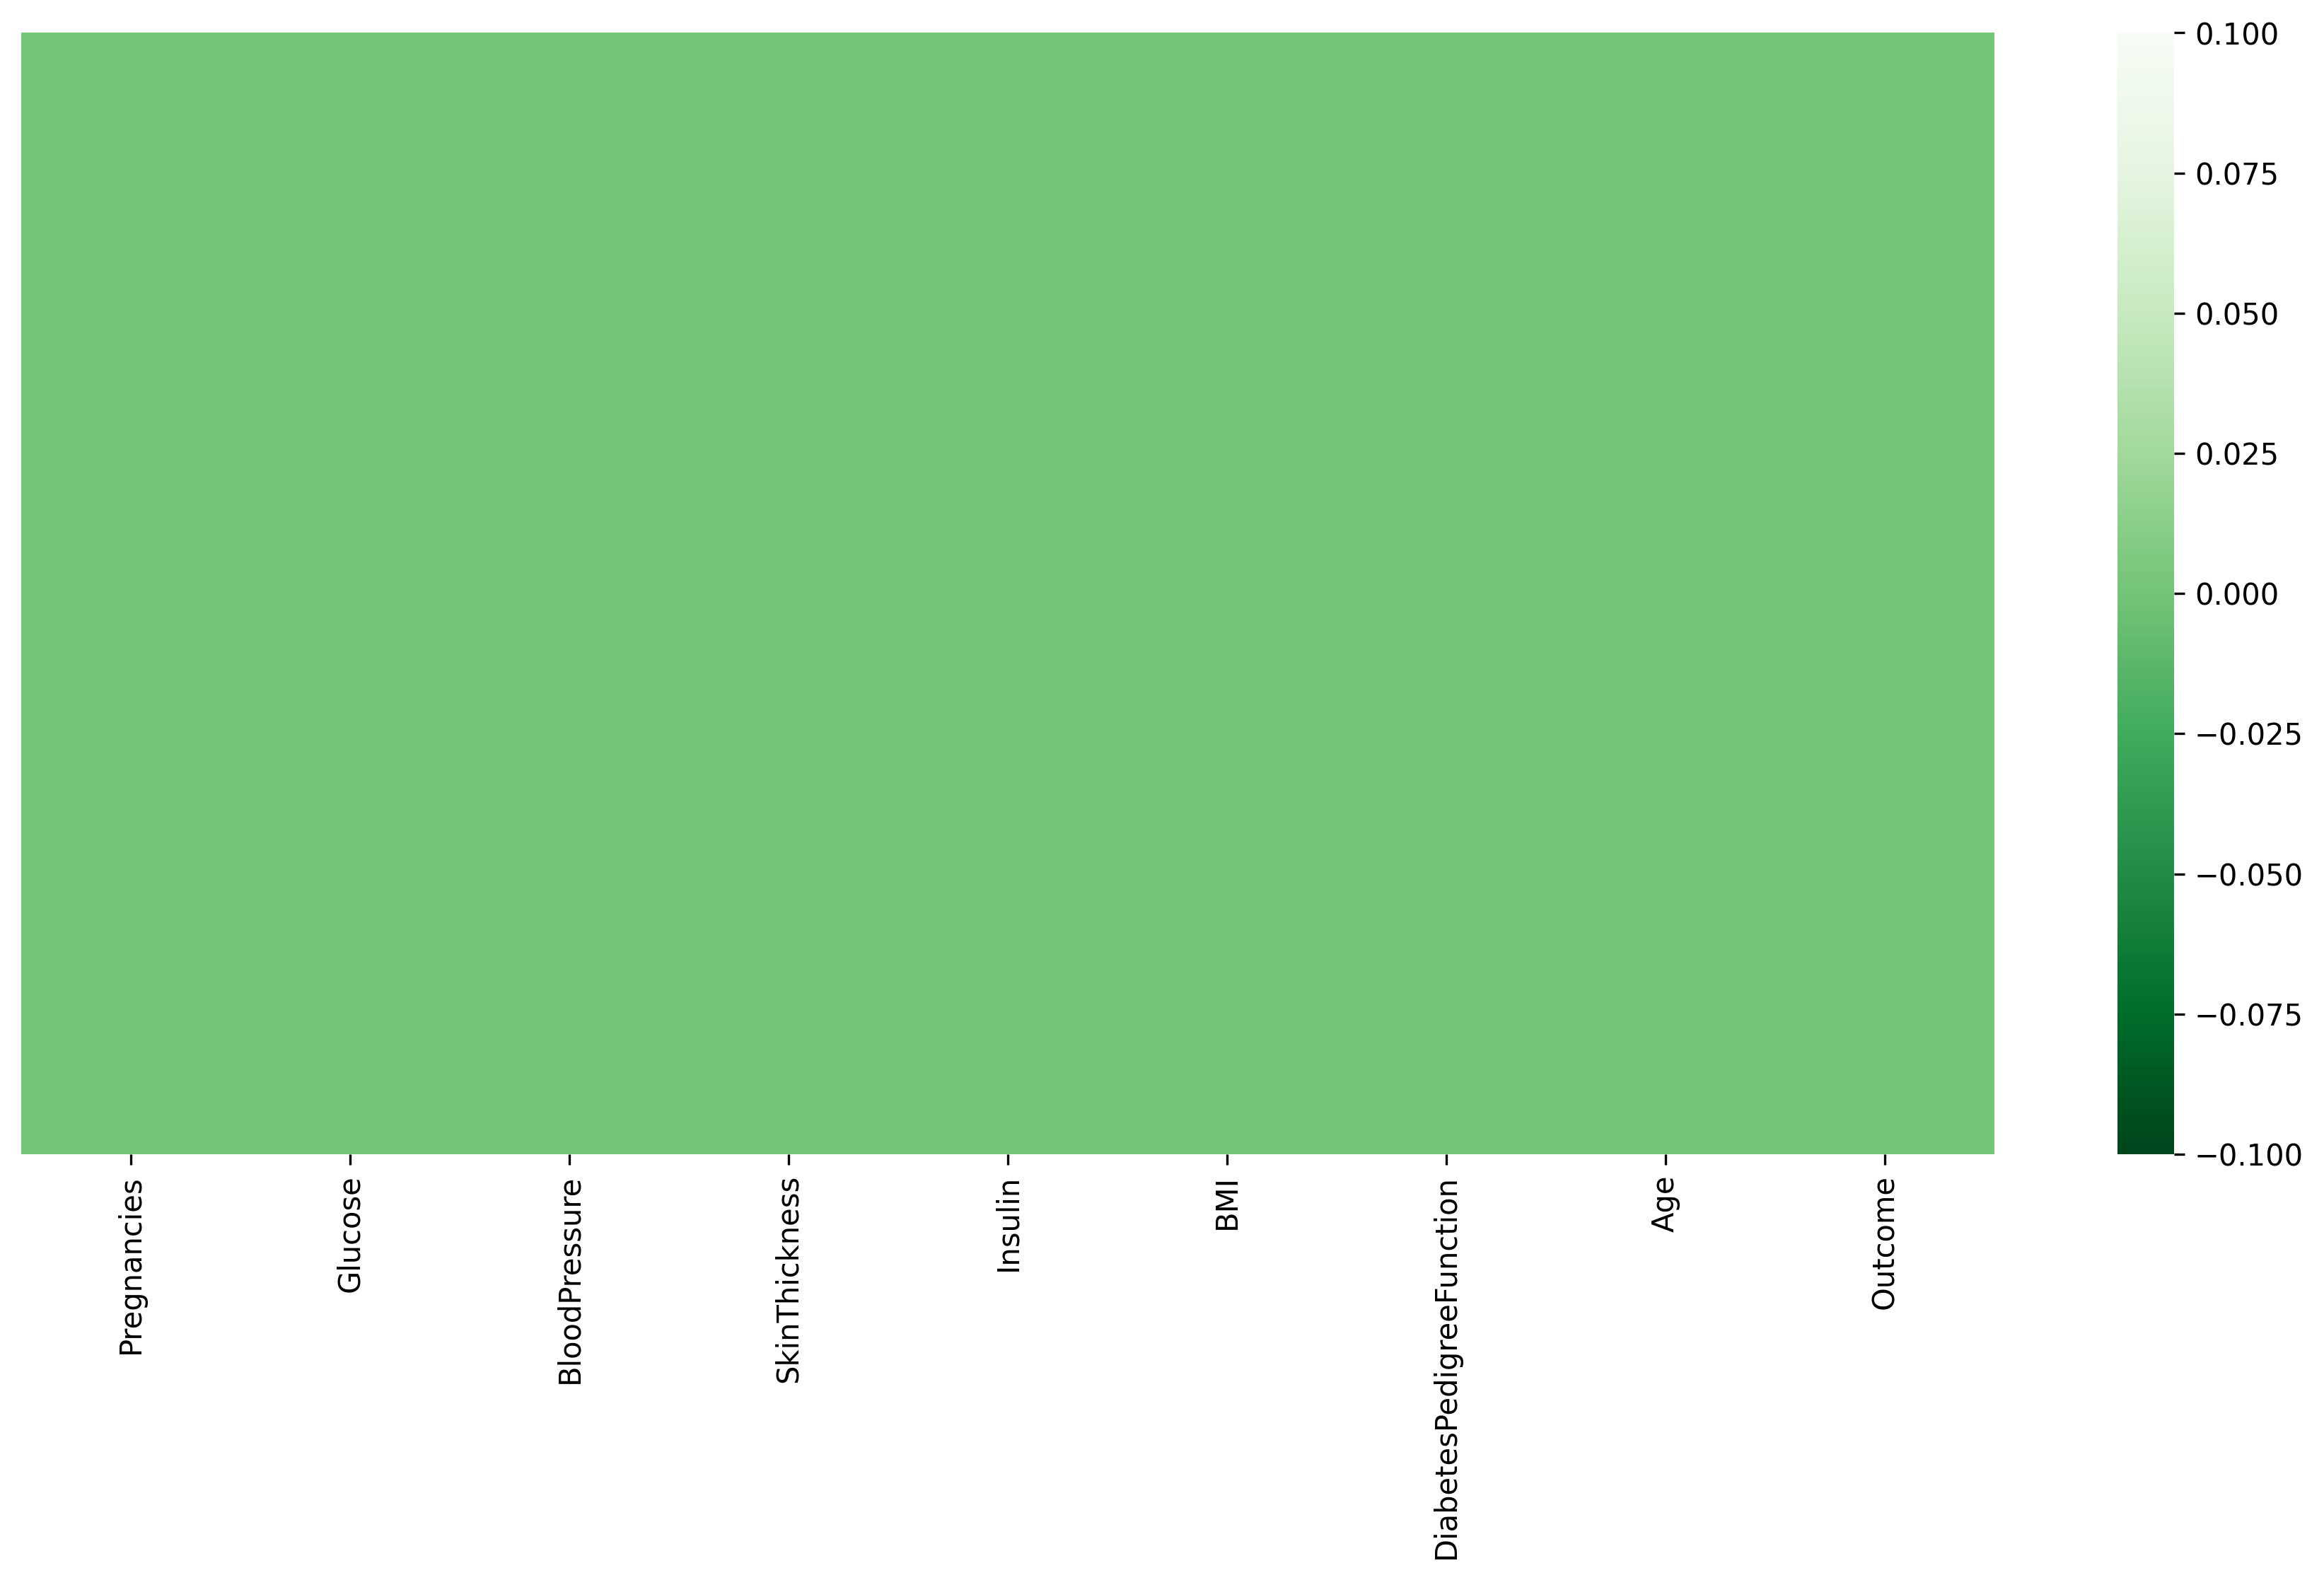

nothing to clean


In [3]:
cl = kgfarm.recommend_cleaning_operations(entity_df)

In [4]:
df = kgfarm.clean(entity_df,cl)

NameError: name 'df' is not defined

In [ ]:
tranformation_info = kgfarm.recommend_feature_transformations(entity_df)
tranformation_info

In [ ]:
entity_df, _ = kgfarm.apply_transformation(tranformation_info.iloc[0], entity_df)
entity_df

In [ ]:
entity_df, _ = kgfarm.apply_transformation(tranformation_info.iloc[1], entity_df)
entity_df

In [ ]:
dependent_variable = 'Outcome'
independent_variables = [feature for feature in list(entity_df.columns) if feature != dependent_variable]

X = entity_df[independent_variables]
y = entity_df[dependent_variable]

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=100)
lrc = LogisticRegression()

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rfc, X, y, cv = 10, scoring='f1').mean()
scores

In [ ]:
k_folds = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True)

scores = cross_val_score(rfc, X, y, cv = k_folds, scoring='f1').mean()
print(scores)
scores1 = cross_val_score(rfc, X, y, cv = k_folds, scoring='precision')#.mean()
print(scores1)
scores2 = cross_val_score(rfc, X, y, cv = k_folds, scoring='recall')#.mean()
print(scores2)
scores = cross_val_score(rfc, X, y, cv = k_folds, scoring='f1').mean()
scores

In [ ]:
X, y = kgfarm.select_features(entity_df, dependent_variable='OVERALL_DIAGNOSIS', select_by='anova')
X

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=100)
lrc = LogisticRegression()

In [ ]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(rfc, X, y, cv = 5, scoring='f1')#.mean()
print(scores)
scores1 = cross_val_score(rfc, X, y, cv = 5, scoring='precision')#.mean()
print(scores1)
scores2 = cross_val_score(rfc, X, y, cv = 5, scoring='recall')#.mean()
print(scores2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
random_forest_classifier=RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
f1_random_forest_classifier = round(f1_score(y_test, y_pred), 3)


kgfarm_approach = {'Random forest classifier': f1_random_forest_classifier}
kgfarm_approach